In [1]:
from clustering import *
from visualization import *
from sklearn.datasets import load_iris
from sklearn.metrics.cluster import fowlkes_mallows_score, silhouette_score, silhouette_samples
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Load Iris

iris = load_iris()
X = iris.data
y = iris.target
iris_dataframe = pd.DataFrame(np.column_stack((X,y)), columns = iris.feature_names+['target'])
feature = []
for col in iris_dataframe.columns:
    if col != 'target':
        feature.append(col)

# Agglomerative

## CLUSTERING

In [3]:
n_cluster = 3
linkage = ['single','complete','average','centroid']
label_list = []
for i in linkage:
    agglomer = HAC(n_cluster, i)
    agglomer.fit(X)
    label_list.append(agglomer.label)

In [10]:
for i in range (0,len(label_list)):
    message = "Label for linkage {} : {}"
    print(message.format(linkage[i],label_list[i]))

Label for linkage single : [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1]
Label for linkage complete : [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 2 1 2 1 2 1 2 2 2 2 1 2 1 2 2 1 2 1 2 1 1
 1 1 1 1 1 2 2 2 2 1 2 1 1 1 2 2 2 1 2 2 2 2 2 1 2 2 1 1 1 1 1 1 2 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1]
Label for linkage average : [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 2 2 2 1 2 2 2 2
 2 2 1 1 2 2 2 2 1 2 1 2 1 2 2 1 1 2 2 2 2 2 1 2 2 2 2 1 2 2 2 1 2 2 2 1 2
 2 1

## EVALUASI

### Fowlkes Mallows

In [11]:
label = label_list
pred = y
for i in range (0,len(label)):
    message = "Fowlkes Mallows {} : {}"
    print(message.format(linkage[i], fowlkes_mallows_score(label[i],pred)))

Fowlkes Mallows single : 0.7635170681000877
Fowlkes Mallows complete : 0.7686371028513819
Fowlkes Mallows average : 0.8407289157574822
Fowlkes Mallows centroid : 0.8407289157574822


### Silhouette Coefficient

In [12]:
# Mean silhouette coefficient for all sample
for i in range(0, len(label)):
    message = "Silhouette Score {}: {}"
    print(message.format(linkage[i],silhouette_score(agglomer.proximityMatrix(X), label[i], metric='precomputed')))

Silhouette Score single: 0.5121107753649309
Silhouette Score complete: 0.5135953221192218
Silhouette Score average: 0.5541608580282855
Silhouette Score centroid: 0.5541608580282855


In [13]:
# Silhouette coefficient for each sample
for i in range(0, len(label)):
    message = "Silhouette Samples {}: \n{}"
    print(message.format(linkage[i],silhouette_samples(agglomer.proximityMatrix(X), label[i], metric='precomputed')))

Silhouette Samples single: 
[ 0.87383613  0.84298091  0.85364746  0.83411894  0.87041638  0.78414258
  0.84715753  0.875376    0.78834567  0.85147844  0.83062065  0.86043515
  0.83846033  0.78039237  0.73860884  0.68639077  0.80508475  0.87232629
  0.74828336  0.84538461  0.81718781  0.85076719  0.81953311  0.82697183
  0.81087199  0.83014389  0.85888226  0.86492135  0.86610018  0.84554328
  0.8436845   0.82878776  0.79355062  0.75669867  0.85467338  0.85579967
  0.82236745  0.86385022  0.80149497  0.87233706  0.87048629  0.69186024
  0.81650847  0.83061888  0.78564151  0.83824395  0.83979366  0.84524834
  0.84374008  0.8736015   0.38353233  0.56109504  0.40218491  0.4934557
  0.58086468  0.62697835  0.54617459 -0.00138131  0.54702523  0.42076593
  0.15216124  0.61883377  0.4973772   0.61788429  0.35143761  0.51522537
  0.61551505  0.53159805  0.59074497  0.46009936  0.57576609  0.57052358
  0.58301637  0.60618816  0.58641536  0.54937579  0.48708526  0.46360817
  0.63208413  0.27713597

## VISUALISASI 

No handles with labels found to put in legend.


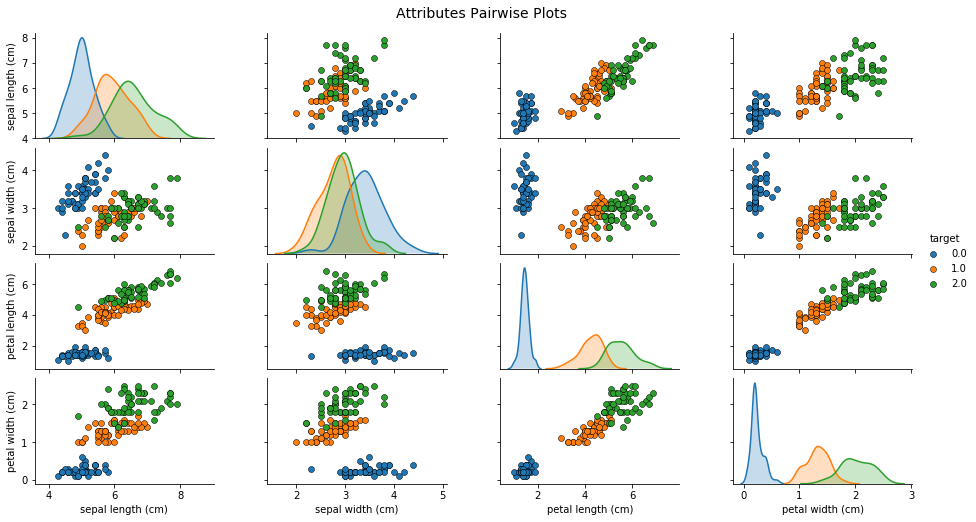

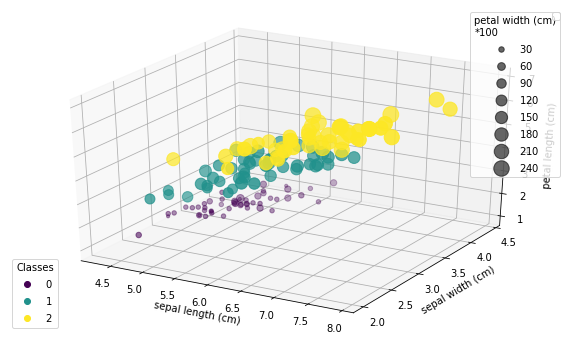

In [14]:
%matplotlib inline
visualization(X, y, iris.feature_names, 'target')

## ANALISIS

Fowlkes-Mallows digunakan untuk menghitung <i>mean</i> dari <i>recall</i> dan <i>precision</i>, nilainya ada dalam rentang 0 sampai 1 dengan semakin tinggi angka berarti semakin besar kemiripan antar cluster.  Meski begitu, Fowlkes-Mallows dapat pula digunakan untuk melihat performa metode clustering karena Fowlkes-Mallows membandingkan label hasil clustering. Dengan begitu, apabila label yang dibandingkan adalah label hasil clustering dengan label data yang sebenarnya, semakin tinggi angka maka semakin akurat hasil clustering.

Berdasarkan evaluasi dengan metrik Fowlkes-Mallows dengan parameter label hasil prediksi dan label kelas sebenarnya, didapatkan angka sebagai berikut : 

* Fowlkes Mallows single : 0.7635170681000877
* Fowlkes Mallows complete : 0.7686371028513819
* Fowlkes Mallows average : 0.8407289157574822
* Fowlkes Mallows centroid : 0.8407289157574822

Dengan angka yang mendekati angka 1, dapat dikatakan bahwa cluster yang terbentuk cukup baik. Berdasarkan nilai Fowlkes-Mallows di atas, clustering dengan <i>linkage average</i> dan <i>average-group</i> (centroid) memiliki nilai yang lebih tinggi daripada yang lainnya. Maka, dapat dikatakan bahwa hasil clustering yang dibentuk dengan <i>linkage average</i> dan <i>average-group</i> memiliki kemiripan label yang tinggi dengan label data sebenarnya.

Sementara itu, Silhouette Coefficient digunakan untuk menghitung seberapa baik klustering sample dengan melihat seberapa dekat relasi antara objek dalam sebuah cluster dan seberapa jauh sebuah cluster terpisah dengan cluster lain. Semakin dekat relasi antara objek dalam sebuah cluster dan semakin jauh sebuah cluster terpisah dengan cluster lain, semakin baik. Silhouette Coefficient memiliki kisaran nilai dalam rentang -1 sampai 1, semakin besar angkanya semakin bagus. Silhouette Coefficient dapat dihitung dengan mencari nilai Silhouette Coefficient pada setiap sample atau mencari nilai mean dari Silhouette Coefficient pada seluruh sample.

Pada eksperimen diperoleh nilai Silhouette Coefficient untuk setiap sample dan setiap linkage sebagai berikut :

* Silhouette Score single: 0.5121107753649309
* Silhouette Score complete: 0.5135953221192218
* Silhouette Score average: 0.5541608580282855
* Silhouette Score centroid: 0.5541608580282855

Berdasarkan nilai Silhouette Coefficient tertinggi, yaitu pada <i>linkage average</i> dan <i>average-group</i>, dapat dikatakan bahwa pada data iris clustering dengan <i>linkage average</i> dan <i>average-group</i> membentuk cluster yang paling optimal dibanding dengan <i>linkage single</i> dan <i>complete</i>.